**Creating DataFrames**

I will create a DataFrame object from a dataset in a CSV file using the read_csv method on the pandas - pd - object. While the read_csv method can read dataset directly from a web URL



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**About the Data**

I will use the dataset on San Francisco city employee salary data available at: https:/:/www.kaggle.com/datasets/kaggle/sf-salaries/.


In [ ]:
df = pd.read_csv('SFSalaries2011_2014.csv')

<ipython-input-46-ed848509744e>:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SFSalaries2011_2014.csv')


**Exploratory Data Analysis (EDA) & Visualization**

I use 'describe' to show basic statistics about the data. Additionally, Seaborn and Matplotlib are employed to generate a histogram illustrating the distribution of total pay in San Francisco, with specified formatting and labeling.






In [ ]:
# Display basic statistics
print(df.describe())

                  Id       TotalPay  TotalPayBenefits           Year  Notes
count  148654.000000  148654.000000     148654.000000  148654.000000    0.0
mean    74327.500000   74768.321972      93692.554811    2012.522643    NaN
std     42912.857795   50517.005274      62793.533483       1.117538    NaN
min         1.000000    -618.130000       -618.130000    2011.000000    NaN
25%     37164.250000   36168.995000      44065.650000    2012.000000    NaN
50%     74327.500000   71426.610000      92404.090000    2013.000000    NaN
75%    111490.750000  105839.135000     132876.450000    2014.000000    NaN
max    148654.000000  567595.430000     567595.430000    2014.000000    NaN


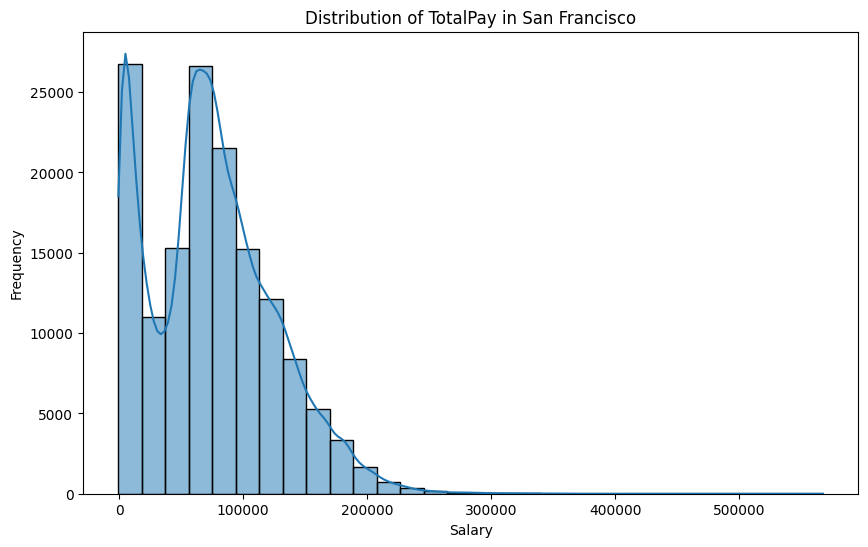

In [ ]:
# Distribution plot of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True)
plt.title('Distribution of TotalPay in San Francisco')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

**Questions for analyzing the data**
1. What is the average salary(TotalPay) in San Francisco?
2. Which job titles have the highest and lowest average salaries(TotalPay)?
3. Which job titles have salaries (TotalPay) close to the mean salary (TotalPay)?
4. Is there a correlation between years of experience and total pay?
5. How does total pay vary across different years?
6. How does the distribution of base pay, overtime pay, and other pay contribute to the total pay?


**Map Questions to Queries on the Pandas Dataframe**

In [ ]:
# 1.
average_salary = df['TotalPay'].mean()
print("The average salary(TotalPay) in San Francisco: ", average_salary)
print()

# 2.
highest_salary_job = df.groupby('JobTitle')['TotalPay'].mean().idxmax()
lowest_salary_job = df.groupby('JobTitle')['TotalPay'].mean().idxmin()
print("The highest average salaries in San Francisco: ", highest_salary_job)
print("The lowest average salaries in San Francisco: ", lowest_salary_job)
print()

# 3
overall_mean_salary = df['TotalPay'].mean()
tolerance = 5 # Define a tolerance level for similarity

similar_job_titles = df[
    (df['TotalPay'] >= overall_mean_salary - tolerance) &
    (df['TotalPay'] <= overall_mean_salary + tolerance)
]['JobTitle'].unique() # Filter job titles with total pay similar to the overall mean

print("Job titles with similar to the overall mean:")
print(similar_job_titles)
print()

# 4.
correlation_experience_total_pay = df['Year'].corr(df['TotalPay'])
print("The correlation between years of experience and total pay: ", correlation_experience_total_pay)
print()

# 5.
total_pay_over_years = df.groupby('Year')['TotalPay'].mean()
print("The total pay vary across different years: ")
print(total_pay_over_years)
print()

# 6.
pay_distribution = df[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay']].describe()
print("The distribution of base pay, overtime pay, and other pay contribute to the total pay: ")
print(pay_distribution)


The average salary(TotalPay) in San Francisco:  74768.32197169267

The highest average salaries in San Francisco:  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
The lowest average salaries in San Francisco:  Drug Court Coordinator

Job titles with similar to the overall mean:
['PUBLIC SAFETY COMMUNICATIONS DISPATCHER' 'ELIGIBILITY WORKER SUPERVISOR'
 'Patient Care Assistant' 'Gardener' 'Executive Secretary 3'
 'Community Police Services Aide' 'Marine Engineer of Fire Boats'
 'Health Care Billing Clerk 2']

The correlation between years of experience and total pay:  0.032090397985590234

The total pay vary across different years: 
Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

The distribution of base pay, overtime pay, and other pay contribute to the total pay: 
            TotalPay
count  148654.000000
mean    74768.321972
std     50517.005274
min      -618.130000
25%     36168.995000
50%     71426.610000
75%  

**Derive Insights**

1. The average total pay in San Francisco is 74768.32197169267.

2. The job title with the highest average total pay is GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY, while the lowest is Drug Court Coordinator.

3. The job titles have salaries(TotalPay) close to the mean salary(TotalPay) are PUBLIC SAFETY COMMUNICATIONS DISPATCHER, ELIGIBILITY WORKER SUPERVISOR, Patient Care Assistant, Gardener, Executive Secretary 3, Community Police Services Aide, Marine Engineer of Fire Boats, Health Care Billing Clerk 2

4. There is a 0.032090397985590234 correlation between years of experience and total pay.

5. Total pay varies across different years, with
        Year
        2011    71744.103871
        2012    74113.262265
        2013    77611.443142
        2014    75463.918140

6. Base pay, overtime pay, and other pay contribute to the total pay, with
          TotalPay
          count  148654.000000
          mean    74768.321972
          std     50517.005274
          min      -618.130000
          25%     36168.995000
          50%     71426.610000
          75%    105839.135000
          max    567595.430000  
 regarding their distributions.


**Communicating Insights**

1. Understanding San Francisco's Compensation Landscape:
The average total pay in San Francisco stands at $74,768.32. This figure serves as a benchmark to comprehend the overall compensation landscape within the dataset.

2. Diverse Compensation Among Job Titles:
Job titles reveal  significant variations in average total pay. For instance, the role of GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY commands the highest average total pay, while the position of Drug Court Coordinator has the lowest.

3. Roles Aligning with the Mean Total Pay:
Notable job titles with salaries (TotalPay) close to the mean include PUBLIC SAFETY COMMUNICATIONS DISPATCHER, ELIGIBILITY WORKER SUPERVISOR, Patient Care Assistant, Gardener, Executive Secretary 3, Community Police Services Aide, Marine Engineer of Fire Boats, and Health Care Billing Clerk 2.

4. Experience and Compensation Correlation:
There is a subtle correlation of 0.0321 between years of experience and total pay. While not a strong correlation, this insight suggests a slight positive relationship between experience and compensation.

5. Temporal Variation in Total Pay:
The dataset reveals variations in total pay across different years. Notably, in 2013, the average total pay reached its peak at $77,611.44, showcasing the dynamic compensation trends over the years.

6. Understanding Components of Total Pay:
Breaking down total pay into components—base pay, overtime pay, and other pay—provides valuable insights. The distribution statistics offer a comprehensive view, including the mean of $74,768.32, a standard deviation of $50,517.01, and a range from a minimum of -$618.13 to a maximum of $567,595.43. These figures illuminate the diverse ways in which different components contribute to the overall compensation structure.










**Conclusion**

By delving into these insights, I gain a understanding of the factors influencing compensation in salaries in San Francisco. This knowledge can guide individuals in career decisions and assist organizations in refining their compensation strategies.